# Pythonで円グラフを作ろう！日本の観光データ分析

## はじめに

こんにちは！このページでは、Pythonを使って円グラフ（"Pie Chart"）を作成する方法を学びます。円グラフは、データの全体に対する各部分の割合を視覚的に表現するのに適しています。今回は、日本の主要観光地の訪問者数データを例に、円グラフの作り方を step by step で説明していきます。

## 円グラフとは

円グラフは、円を扇形に分割してデータの比率を表す統計グラフです。各扇形の大きさは、それぞれのデータが全体に占める割合を表します。

## データの準備

まずは、分析に使うデータを準備しましょう。今回は、日本の主要観光地の年間訪問者数データを使用します。


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの作成
data = {
    '観光地': ['東京', '京都', '大阪', '北海道', '沖縄'],
    '訪問者数': [5000000, 3000000, 2500000, 2000000, 1500000]
}

df = pd.DataFrame(data)
print(df)


   観光地     訪問者数
0   東京  5000000
1   京都  3000000
2   大阪  2500000
3  北海道  2000000
4   沖縄  1500000


このコードでは：
1. 必要なライブラリ（pandas と matplotlib）をインポートします。
2. 日本語フォントを設定します。
3. 架空の観光データを辞書形式で作成し、DataFrameに変換します。
4. 作成したDataFrameを表示して確認します。

## 基本的な円グラフの作成

次に、基本的な円グラフを作成します。


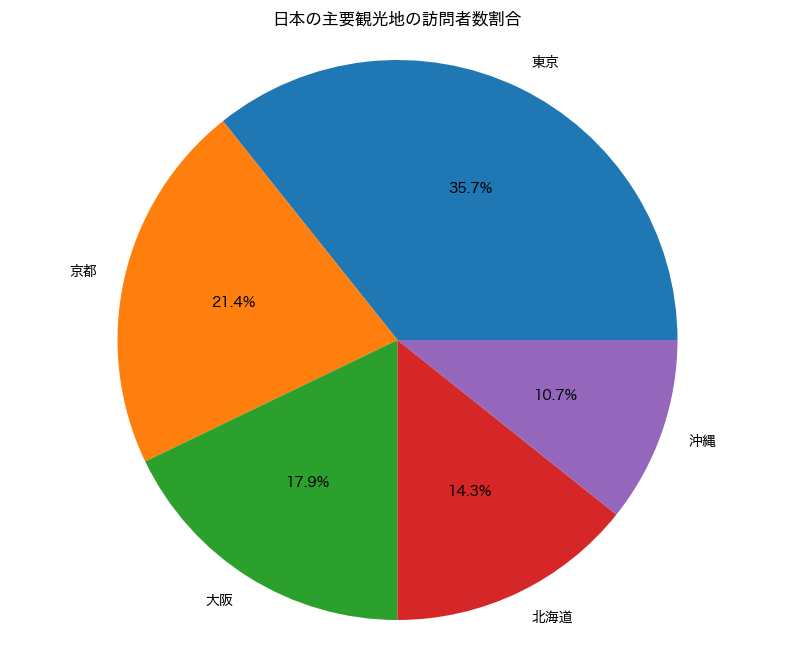

合計訪問者数: 14000000


In [7]:
# 基本的な円グラフの作成
plt.figure(figsize=(10, 8))
plt.pie(df['訪問者数'], labels=df['観光地'], autopct='%1.1f%%')
plt.title('日本の主要観光地の訪問者数割合')
plt.axis('equal')  # 円を真円に保つ
plt.savefig('pie_chart_basic.png')
plt.show()

print("合計訪問者数:", df['訪問者数'].sum())


このコードの説明：
1. `plt.figure(figsize=(10, 8))`でグラフのサイズを設定します。
2. `plt.pie()`で円グラフを作成します。`df['訪問者数']`がデータ、`labels=df['観光地']`でラベルを設定します。
3. `autopct='%1.1f%%'`で各扇形に百分率を表示します。
4. `plt.title()`でグラフのタイトルを設定します。
5. `plt.axis('equal')`で円を真円に保ちます。
6. `plt.savefig()`でグラフを画像として保存します。
7. 合計訪問者数を表示して、全体の規模を確認します。

## カスタマイズした円グラフの作成

円グラフをさらに見やすくカスタマイズしてみましょう。


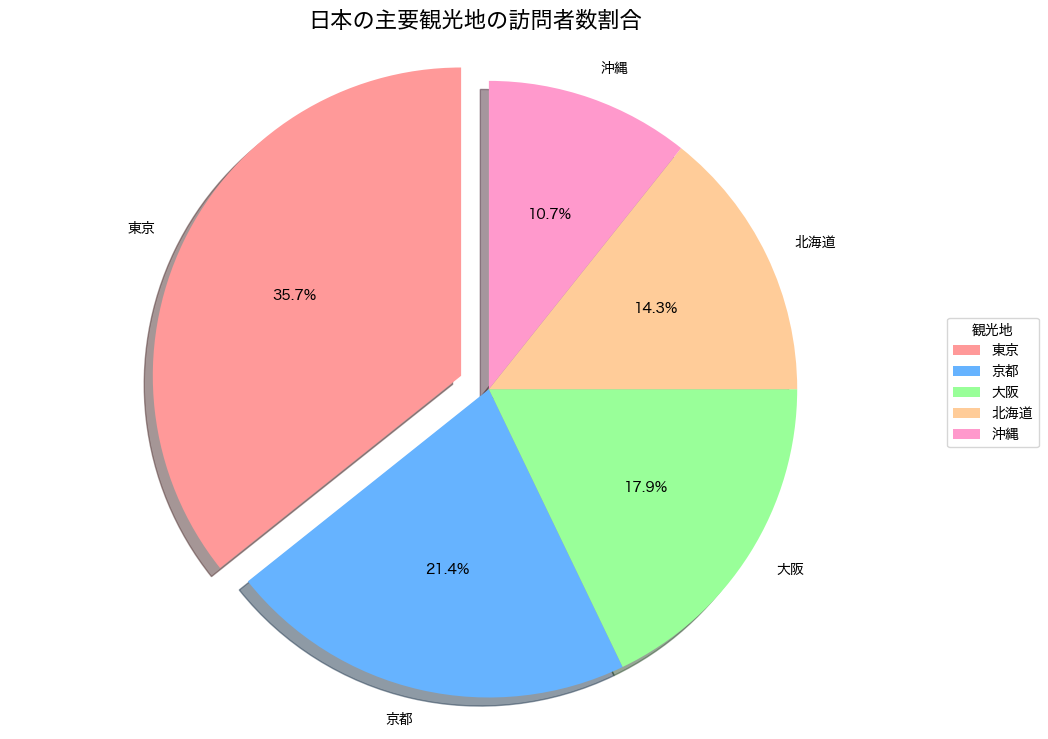

東京: 5,000,000人 (35.7%)
京都: 3,000,000人 (21.4%)
大阪: 2,500,000人 (17.9%)
北海道: 2,000,000人 (14.3%)
沖縄: 1,500,000人 (10.7%)


In [8]:
# カスタマイズした円グラフの作成
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = (0.1, 0, 0, 0, 0)  # 最大値の扇形を強調

plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(df['訪問者数'], 
                                   labels=df['観光地'], 
                                   autopct='%1.1f%%',
                                   explode=explode,
                                   colors=colors,
                                   shadow=True,
                                   startangle=90)

plt.title('日本の主要観光地の訪問者数割合', fontsize=16)
plt.axis('equal')

# 凡例の追加
plt.legend(wedges, df['観光地'],
           title="観光地",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('pie_chart_custom.png', bbox_inches='tight')
plt.show()

# 各観光地の訪問者数と割合を表示
for i, row in df.iterrows():
    percentage = row['訪問者数'] / df['訪問者数'].sum() * 100
    print(f"{row['観光地']}: {row['訪問者数']:,}人 ({percentage:.1f}%)")




このコードの詳細説明：
1. `colors`リストで各扇形の色を指定します。
2. `explode`タプルで特定の扇形（ここでは最大値）を強調します。
3. `plt.pie()`の引数を拡張し、色や強調を適用します。
4. `shadow=True`で影をつけ、立体感を出します。
5. `startangle=90`で開始角度を90度に設定します。
6. `plt.legend()`で凡例を追加し、グラフ外に配置します。
7. `bbox_inches='tight'`でグラフの余白を自動調整して保存します。
8. 各観光地の詳細な訪問者数と割合を表示します。

## まとめ

このページでは、Pythonを使って円グラフを作成する方法を学びました。円グラフは、データの比率を視覚的に表現するのに適しており、以下のような特徴があります：

1. 全体に対する各部分の割合を直感的に理解できる
2. 色やラベルを使って各カテゴリーを区別しやすい
3. `explode`パラメータを使って特定の部分を強調できる

円グラフは、観光データの分析において以下のような場面で活用できます：
- 主要観光地の人気度比較
- 観光客の年齢層や出身地の内訳
- 観光収入の内訳分析

ただし、円グラフには以下の注意点もあります：
1. カテゴリーが多すぎると見づらくなる（5〜7個程度が適切）
2. 比率の微妙な差異が分かりにくい場合がある
3. 合計が100%になるデータにのみ適している

これらの点を考慮しながら、適切な場面で円グラフを活用しましょう。データの特性に応じて、棒グラフや折れ線グラフなど、他の種類のグラフと使い分けることも大切です。

ぜひ、このテクニックを使って、自分の興味のある観光データを分析してみてください。データの可視化を通じて、新たな洞察が得られるかもしれません！

問題1
あなたは、1ヶ月の食費支出を記録しました。以下のデータを使って、食費の内訳を表す円グラフを作成してください。

データ：
カテゴリ = ['食材', '外食', '弁当', 'カフェ', 'その他']
支出 = [45000, 30000, 15000, 10000, 5000]

以下の要件を満たす円グラフを作成してください：
1. グラフのタイトルを「1ヶ月の食費内訳」とする
2. 各カテゴリの割合を％で表示する
3. 最大支出のカテゴリを強調表示する
4. 凡例をグラフの右側に表示する
5. グラフに影をつける

解答例(Pythonコード):


  カテゴリ     支出
0   食材  45000
1   外食  30000
2   弁当  15000
3  カフェ  10000
4  その他   5000


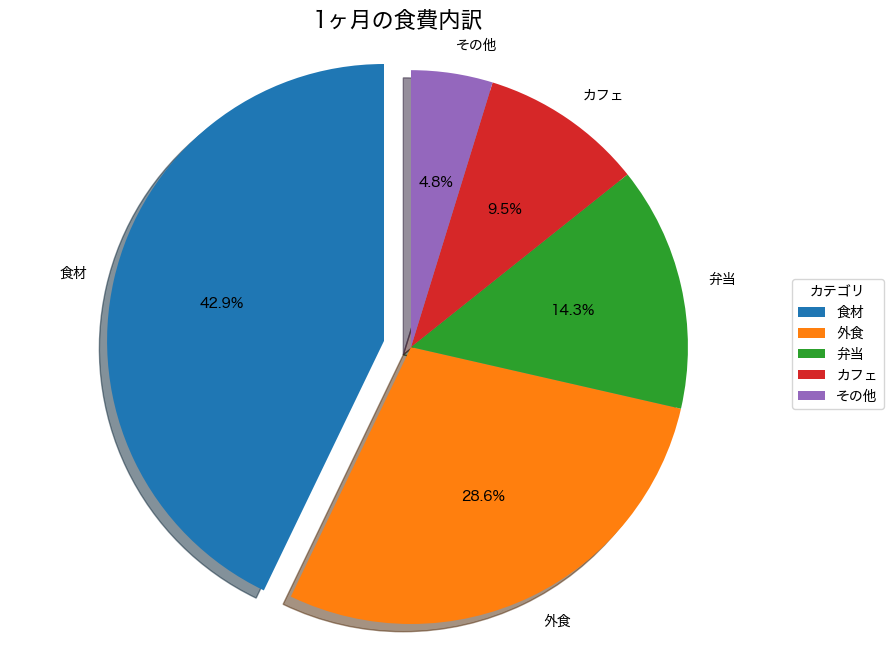

食材: 45,000円 (42.9%)
外食: 30,000円 (28.6%)
弁当: 15,000円 (14.3%)
カフェ: 10,000円 (9.5%)
その他: 5,000円 (4.8%)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの準備
data = {
    'カテゴリ': ['食材', '外食', '弁当', 'カフェ', 'その他'],
    '支出': [45000, 30000, 15000, 10000, 5000]
}

df = pd.DataFrame(data)
print(df)

# 円グラフの作成
explode = (0.1, 0, 0, 0, 0)  # 最大支出のカテゴリ（食材）を強調

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(df['支出'],
                                   labels=df['カテゴリ'],
                                   autopct='%1.1f%%',
                                   explode=explode,
                                   shadow=True,
                                   startangle=90)

plt.title('1ヶ月の食費内訳', fontsize=16)

# 凡例の追加
plt.legend(wedges, df['カテゴリ'],
           title="カテゴリ",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

# 各カテゴリの支出額と割合を表示
total = df['支出'].sum()
for i, row in df.iterrows():
    percentage = row['支出'] / total * 100
    print(f"{row['カテゴリ']}: {row['支出']:,}円 ({percentage:.1f}%)")


解説:
1. 必要なライブラリ（pandas と matplotlib.pyplot）をインポートし、日本語フォントを設定します。
2. 提供されたデータを辞書形式で定義し、それをpandasのDataFrameに変換します。
3. `print(df)` でデータを確認します。
4. `plt.figure(figsize=(10, 8))` でグラフのサイズを設定します。
5. `plt.pie()` 関数を使って円グラフを作成します。`explode` パラメータで最大支出のカテゴリ（食材）を強調表示します。
6. `autopct='%1.1f%%'` で各扇形に百分率を表示します。
7. `shadow=True` でグラフに影をつけます。
8. `plt.title()` でグラフのタイトルを設定します。
9. `plt.legend()` で凡例を追加し、グラフの右側に配置します。
10. `plt.axis('equal')` で円を真円に保ちます。
11. `plt.show()` でグラフを表示します。
12. 最後に、各カテゴリの支出額と割合を計算して表示します。

このグラフを見ることで、1ヶ月の食費の内訳を視覚的に理解することができます。



問題2
あなたの町内会で、今年の夏祭りの出し物の人気投票を行いました。以下のデータを使って、各出し物の人気度を表す円グラフを作成してください。

データ：
出し物 = ['焼きそば', 'かき氷', '金魚すくい', 'ヨーヨー釣り', 'くじ引き']
投票数 = [120, 85, 65, 45, 35]

以下の要件を満たす円グラフを作成してください：
1. グラフのタイトルを「夏祭り出し物の人気投票結果」とする
2. 各出し物の割合を％で表示する
3. 最も人気のある出し物を強調表示する
4. 凡例をグラフの下に表示する
5. 自分の好きな配色を使用する

解答例(Pythonコード):


      出し物  投票数
0    焼きそば  120
1     かき氷   85
2   金魚すくい   65
3  ヨーヨー釣り   45
4    くじ引き   35


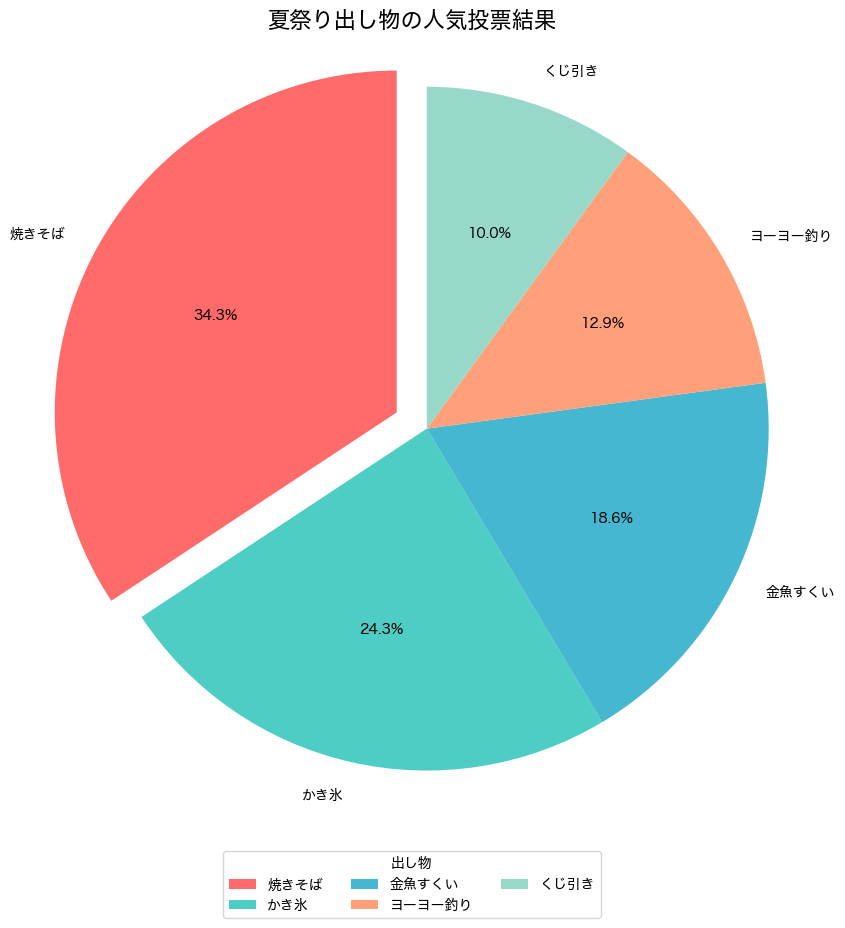

焼きそば: 120票 (34.3%)
かき氷: 85票 (24.3%)
金魚すくい: 65票 (18.6%)
ヨーヨー釣り: 45票 (12.9%)
くじ引き: 35票 (10.0%)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの準備
data = {
    '出し物': ['焼きそば', 'かき氷', '金魚すくい', 'ヨーヨー釣り', 'くじ引き'],
    '投票数': [120, 85, 65, 45, 35]
}

df = pd.DataFrame(data)
print(df)

# 円グラフの作成
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
explode = (0.1, 0, 0, 0, 0)  # 最も人気のある出し物（焼きそば）を強調

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(df['投票数'],
                                   labels=df['出し物'],
                                   autopct='%1.1f%%',
                                   explode=explode,
                                   colors=colors,
                                   shadow=False,
                                   startangle=90)

plt.title('夏祭り出し物の人気投票結果', fontsize=16)

# 凡例の追加
plt.legend(wedges, df['出し物'],
           title="出し物",
           loc="upper center",
           bbox_to_anchor=(0.5, -0.05),
           ncol=3)

plt.axis('equal')
plt.show()

# 各出し物の投票数と割合を表示
total = df['投票数'].sum()
for i, row in df.iterrows():
    percentage = row['投票数'] / total * 100
    print(f"{row['出し物']}: {row['投票数']}票 ({percentage:.1f}%)")



解説:
1. 必要なライブラリ（pandas と matplotlib.pyplot）をインポートし、日本語フォントを設定します。
2. 提供されたデータを辞書形式で定義し、それをpandasのDataFrameに変換します。
3. `print(df)` でデータを確認します。
4. `plt.figure(figsize=(10, 10))` でグラフのサイズを設定します。
5. `plt.pie()` 関数を使って円グラフを作成します。`explode` パラメータで最も人気のある出し物（焼きそば）を強調表示します。
6. `autopct='%1.1f%%'` で各扇形に百分率を表示します。
7. `colors` リストでカラフルな配色を指定します。
8. `shadow=True` でグラフに影をつけます。
9. `plt.title()` でグラフのタイトルを設定します。
10. `plt.legend()` で凡例を追加し、グラフの下に配置します。`ncol=3` で凡例を3列に配置します。
11. `plt.axis('equal')` で円を真円に保ちます。
12. `plt.show()` でグラフを表示します。
13. 最後に、各出し物の投票数と割合を計算して表示します。

このグラフを見ることで、夏祭りの出し物の人気度を視覚的に理解することができます。焼きそばが最も人気があり、全体の約3分の1を占めていることがわかります。